In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(50)

In [3]:
mm_chuva = np.arange(50, 150)
colheita = np.arange(3, 103)

In [4]:
desvio = np.random.random(size=100)

In [5]:
mm_chuva = mm_chuva * (desvio * 0.10)

In [6]:
colheita = colheita * (desvio * 0.10)

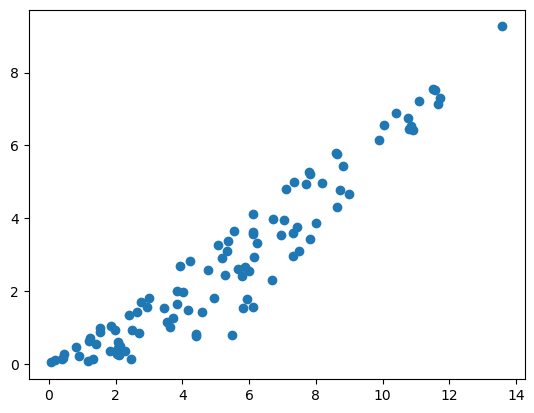

In [11]:
plt.scatter(mm_chuva, colheita)

In [27]:
w=0.6
b=0

In [28]:
y_hat = mm_chuva * w + b

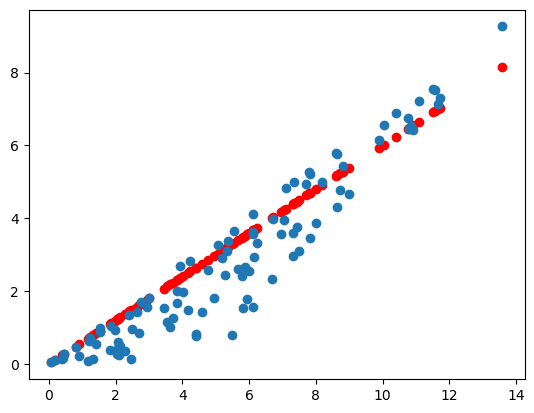

In [29]:
plt.scatter(mm_chuva, y_hat, color='r')
plt.scatter(mm_chuva, colheita)
plt.show()

In [17]:
mm_chuva.shape[0]

100

In [18]:
def computar_custo(x, y, w, b):
    m = x.shape[0]
    custo = 0
    for i in range(m):
        y_hat = x[i] * w + b
        custo = custo + (y_hat - y[i]) ** 2
    custo_final = 1 / (m * 2) * custo
    return custo_final

In [19]:
computar_custo(mm_chuva, colheita, w, b)

41.20544520851299

In [20]:
w = 3
b = 0
computar_custo(mm_chuva, colheita, w, b)

117.93942416646019

In [21]:
w = 1
b = 0
computar_custo(mm_chuva, colheita, w, b)

4.083249905086972

In [24]:
w = 0.5
b = 0
computar_custo(mm_chuva, colheita, w, b)

0.37657112381940716

In [23]:
w = 0.2
b = 0
computar_custo(mm_chuva, colheita, w, b)

2.9059778936014102

In [25]:
w = 0.6
b = 0
computar_custo(mm_chuva, colheita, w, b)

0.32567120698249646

In [26]:
w = 0.7
b = 0
computar_custo(mm_chuva, colheita, w, b)

0.670889126690797

In [31]:
hist_w = []
hist_custo = []
for i in range(60, 0, -1):
    w = i / 10
    custo = computar_custo(mm_chuva, colheita, w, b)
    hist_w.append(w)
    hist_custo.append(custo)
    

In [32]:
hist_w

[6.0,
 5.9,
 5.8,
 5.7,
 5.6,
 5.5,
 5.4,
 5.3,
 5.2,
 5.1,
 5.0,
 4.9,
 4.8,
 4.7,
 4.6,
 4.5,
 4.4,
 4.3,
 4.2,
 4.1,
 4.0,
 3.9,
 3.8,
 3.7,
 3.6,
 3.5,
 3.4,
 3.3,
 3.2,
 3.1,
 3.0,
 2.9,
 2.8,
 2.7,
 2.6,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.9,
 1.8,
 1.7,
 1.6,
 1.5,
 1.4,
 1.3,
 1.2,
 1.1,
 1.0,
 0.9,
 0.8,
 0.7,
 0.6,
 0.5,
 0.4,
 0.3,
 0.2,
 0.1]

In [33]:
hist_custo

[585.8120629674289,
 564.4725997108246,
 543.5292542907652,
 522.9820267072512,
 502.83091696028174,
 483.07592504985826,
 463.7170509759799,
 444.7542947386466,
 426.18765633785836,
 408.01713577361573,
 390.24273304591816,
 372.8644481547658,
 355.88228110015837,
 339.29623188209655,
 323.10630050057983,
 307.3124869556082,
 291.914791247182,
 276.91321337530076,
 262.30775333996473,
 248.09841114117407,
 234.2851867789285,
 220.86808025322821,
 207.84709156407317,
 195.22222071146342,
 182.9934676953987,
 171.16083251587924,
 159.72431517290494,
 148.683915666476,
 138.03963399659222,
 127.79147016325362,
 117.93942416646019,
 108.48349600621202,
 99.42368568250905,
 90.75999319535131,
 82.49241854473878,
 74.62096173067144,
 67.14562275314931,
 60.066401612172406,
 53.38329830774075,
 47.096312839854235,
 41.20544520851299,
 35.71069541371695,
 30.612063455466085,
 25.909549333760452,
 21.60315304860004,
 17.692874599984833,
 14.178713987914831,
 11.06067121239005,
 8.3387462734104

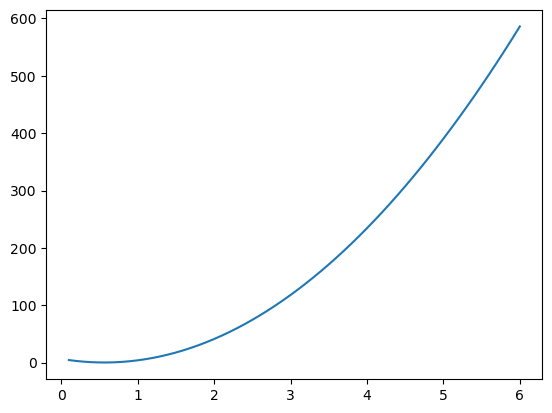

In [34]:
plt.plot(hist_w, hist_custo)

In [36]:
def calcular_derivada_wb(x, y, w, b):
    m = x.shape[0]
    dw_soma = 0
    db_soma = 0
    for i in range(m):
        y_hat = x[i] * w + b
        dw_i = (y_hat - y[i]) * x[i]
        db_i = (y_hat - y[i])
        dw_soma = dw_soma + dw_i
        db_soma = db_soma + db_i
    jdw_soma = dw_soma / m
    jdb_soma = db_soma / m
    return jdw_soma, jdb_soma

In [38]:
calcular_derivada_wb(mm_chuva, colheita, 2.0, 0)

(56.92808713068662, 7.936433719473764)

In [39]:
def descida_gradiente(x, y, w_inicial, b_inicial, alpha, iteracoes):
    m = x.shape[0]
    w = w_inicial
    b = b_inicial
    hist_cust = []
    hist_param = []
    for i in range(iteracoes):
        dw_i, db_i = calcular_derivada_wb(x, y, w, b)
        w = w - alpha * dw_i
        b = b - alpha * db_i
        custo = computar_custo(x, y, w, b)
        hist_cust.append(custo)
        hist_param.append( [w, b] )
    return hist_cust, hist_param, w, b
        

In [57]:
hist_cust, hist_param, _, _ = descida_gradiente(mm_chuva, colheita, 100.0, 0, 0.001, 300)

In [58]:
hist_param = np.array(hist_param)

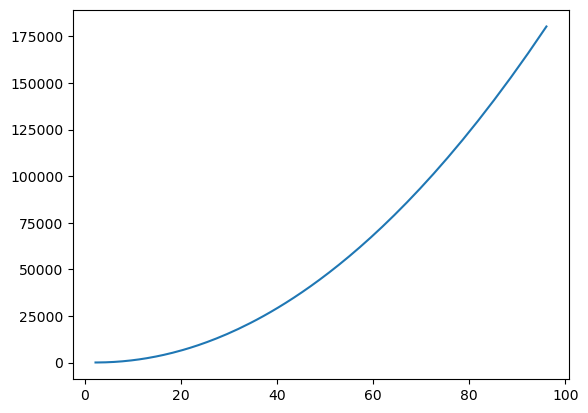

In [59]:
plt.plot(hist_param[:, 0], hist_cust)